## Problem Statement

XYZ Corp, a leading manufacturer of mining equipment, is facing challenges with unexpected machine failures in their rock drilling tools, leading to costly downtime and reduced productivity at mining sites. The company aims to enhance its equipment performance and minimize unplanned maintenance by implementing a predictive maintenance system.

Using the AI4I 2020 Predictive Maintenance Dataset, which simulates real-world industrial machinery data, XYZ Corp seeks to develop a machine learning model that can:
1. Accurately predict potential machine failures before they occur.
2. Identify the most critical factors contributing to different types of failures (TWF, HDF, PWF, OSF, RNF).
3. Provide actionable insights to optimize operational parameters and maintenance schedules.

## Data Description

### <u>Attributes</u>

The dataset includes the following features:

**1. _UID_:** Unique identifier for each data point, ranging from 1 to 10,000.

**2. _Product ID_:** Identifier for the product consisting of a letter (L, M, or H) indicating product quality (Low, Medium, High) and a variant-specific serial number.

**3. _Type_:**  Letters L, M, or H indicates the product quality (Low, Medium, High).

**4. _Air Temperature [K]_:** Air temperature measured in Kelvin, generated using a random walk process and normalized to a standard deviation of 2 K around 300 K.

**5. _Process Temperature [K]_:** Process temperature measured in Kelvin, generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

**6. _Rotational Speed [rpm]_:** Rotational speed of the machine in revolutions per minute, calculated from a power of 2860 W with normally distributed noise.

**7. _Torque [Nm]_:** Torque values in Newton meters, normally distributed around 40 Nm with a standard deviation of 10 Nm, ensuring no negative values.

**8. _Tool Wear [min]_:** Tool wear time in minutes, with quality variants H/M/L adding 5/3/2 minutes of tool wear to the used tool in the process.

**9. _Machine Failure_:** Binary label indicating whether the machine has failed (1) or not (0) for any of the following failure modes:

- **_Tool Wear Failure (TWF)_:** Occurs when tool wear time exceeds a randomly selected threshold between 200-240 minutes.
- **_Heat Dissipation Failure (HDF)_:** Occurs if the difference between air and process temperature is below 8.6 K and the rotational speed is below 1380 rpm.
- **_Power Failure (PWF)_:** Occurs if the product of torque and rotational speed (in rad/s) is below 3500 W or above 9000 W.
- **_Overstrain Failure (OSF)_:** Occurs if the product of tool wear and torque exceeds 11,000 minNm for L variant (12,000 M, 13,000 H).
- **_Random Failures (RNF)_:** Random failures occurring with a probability of 0.1% for each process.

### <u>Failure Modes</u>

The dataset includes five independent failure modes, each contributing to the overall machine failure label:

**1. _Tool Wear Failure (TWF)_:** The tool is replaced or fails at a randomly selected tool wear time between 200-240 minutes. In the dataset, this occurs 120 times, with 69 replacements and 51 failures.

**2. _Heat Dissipation Failure (HDF)_:** Heat dissipation causes a process failure if the difference between air and process temperature is below 8.6 K and the rotational speed is below 1380 rpm. This occurs 115 times in the dataset.

**3. _Power Failure (PWF)_:** The process fails if the power required (product of torque and rotational speed) is below 3500 W or above 9000 W. This occurs 95 times in the dataset.

**4. _Overstrain Failure (OSF)_:** The process fails due to overstrain if the product of tool wear and torque exceeds specific thresholds for L, M, and H variants. This occurs 98 times in the dataset.

**5. _Random Failures (RNF)_:** Each process has a 0.1% chance of failing regardless of its parameters, resulting in 5 random failures in the dataset.

## Objective

The goal is to create a data-driven solution that will enable XYZ Corp to:
1. Reduce unexpected downtime by at least 25%
2. Increase the overall equipment effectiveness (OEE) by 15%
3. Optimize maintenance schedules to reduce costs while ensuring equipment reliability
4. Provide real-time monitoring and early warning systems for potential failures

By successfully implementing this predictive maintenance system, XYZ Corp aims to improve customer satisfaction, reduce operational costs, and maintain its position as an industry leader in mining equipment reliability and performance.

## Data Collection

In [1]:
# Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
# Load the data
equip = pd.read_csv('/users/nik/downloads/equipment_dataset.csv')
# lets see the dataset
equip.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Displaying the info
equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [4]:
# Displaying the description 
equip.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Data Cleaning

In [5]:
# Check for missing values
print("\nMissing values:")
print(equip.isnull().sum())


Missing values:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


As we can see there are zero Null values, so we don't need to make changes to the data in respect to the missing values.

In [6]:
# Check for duplicates
print("\nDuplicate rows:", equip.duplicated().sum())


Duplicate rows: 0


There are no duplicate rows in our data to drop.

## Exploratory Data Analysis (EDA)

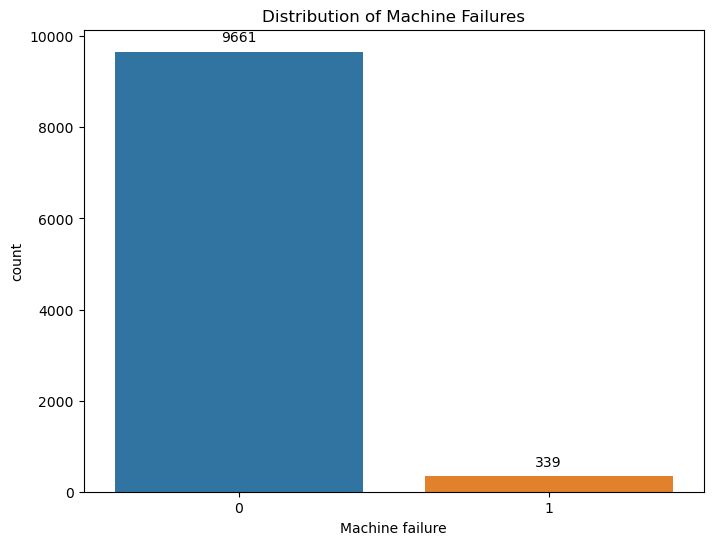


Percentage of machine failures: 3.39%


In [7]:
# Plot the distribution of machine failures
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Machine failure', data=equip)
plt.title('Distribution of Machine Failures')

# Add actual numbers on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), textcoords='offset points')

plt.show()

# Calculate the percentage of machine failures
failure_percentage = equip['Machine failure'].mean() * 100
print(f"\nPercentage of machine failures: {failure_percentage:.2f}%")

Bar chart depicts the number of Machine faliure which is 339 out of 10000. The percentage is 3.39% which is pretty low and it indicates that most of our machines are working fine.

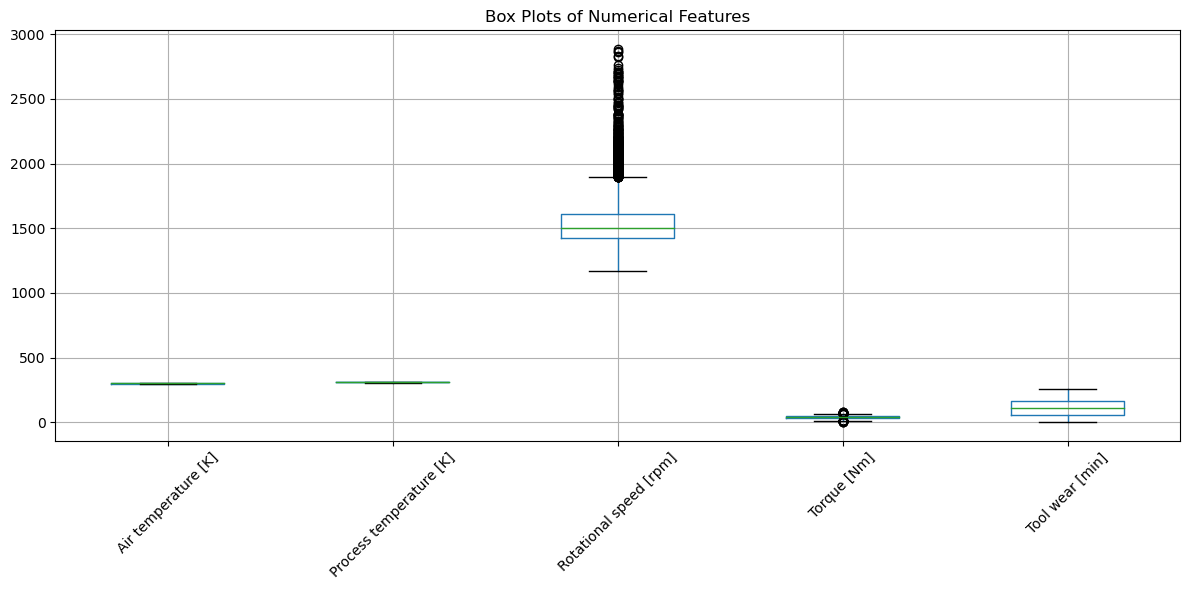

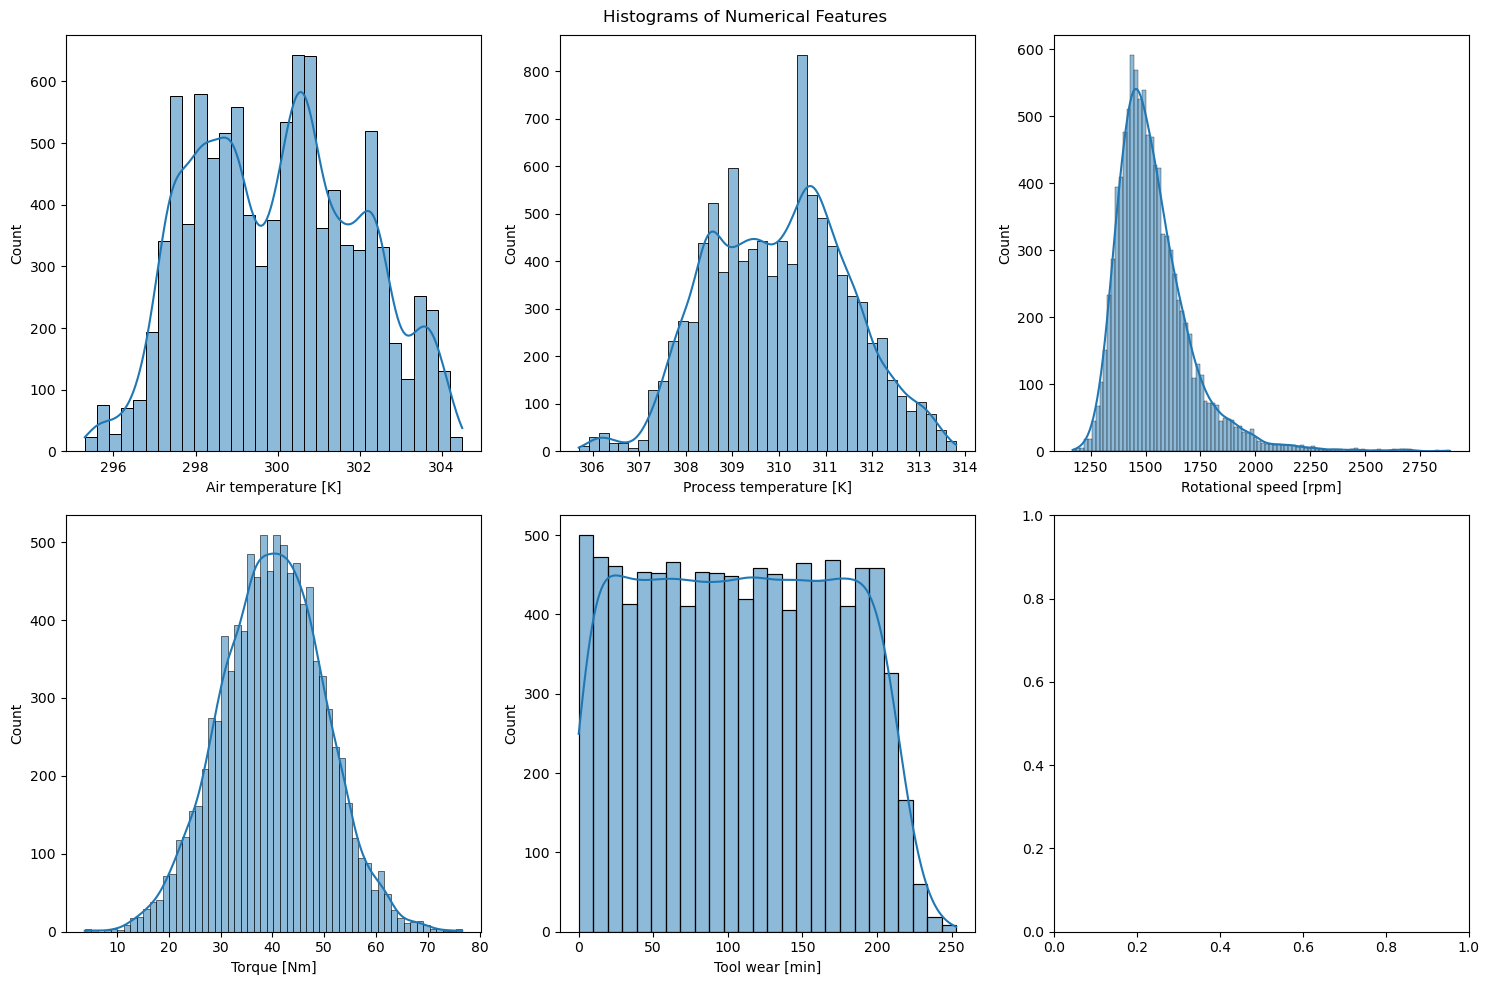

In [8]:
# Explore Numerical Features
# Select numerical features
numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create box plots for numerical features
plt.figure(figsize=(12, 6))
equip.boxplot(column=numerical_features)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create histograms for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Histograms of Numerical Features')

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=equip, x=feature, kde=True, ax=axes[row, col])

plt.tight_layout()
plt.show()

As per the Boxplot, Rotational Speed has a high number of outliers which shows the imbalance in the data and that it is right-skewed data. This means that the models might turn out to be innacurate. However, in this case outliers should not be treated as it is the actual speed of the rotation of the equipment which may will always have outliers and differ depening on the task it is performing, to keep the useful data we won't make any changes to it.

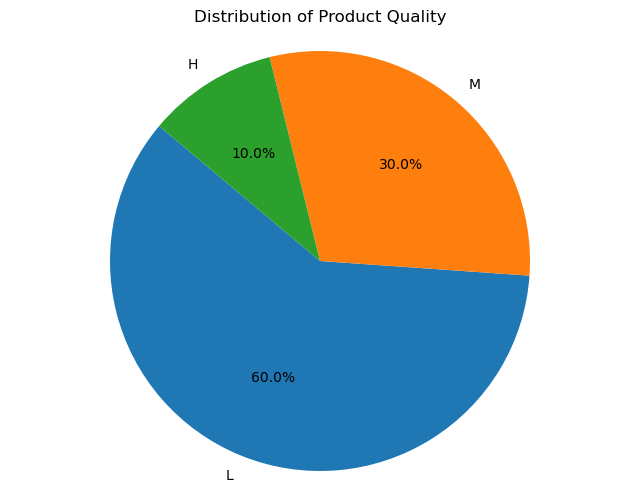

In [9]:
# Explore the distribution of product quality
# Calculate the distribution of product quality
quality_counts = equip['Type'].value_counts()

# Plot the distribution as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Quality')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Pie chart Portrays the percentage of the quality of the equipment with Low quality machinery takes the highest share of 60% while high quality machinery is just 10%.

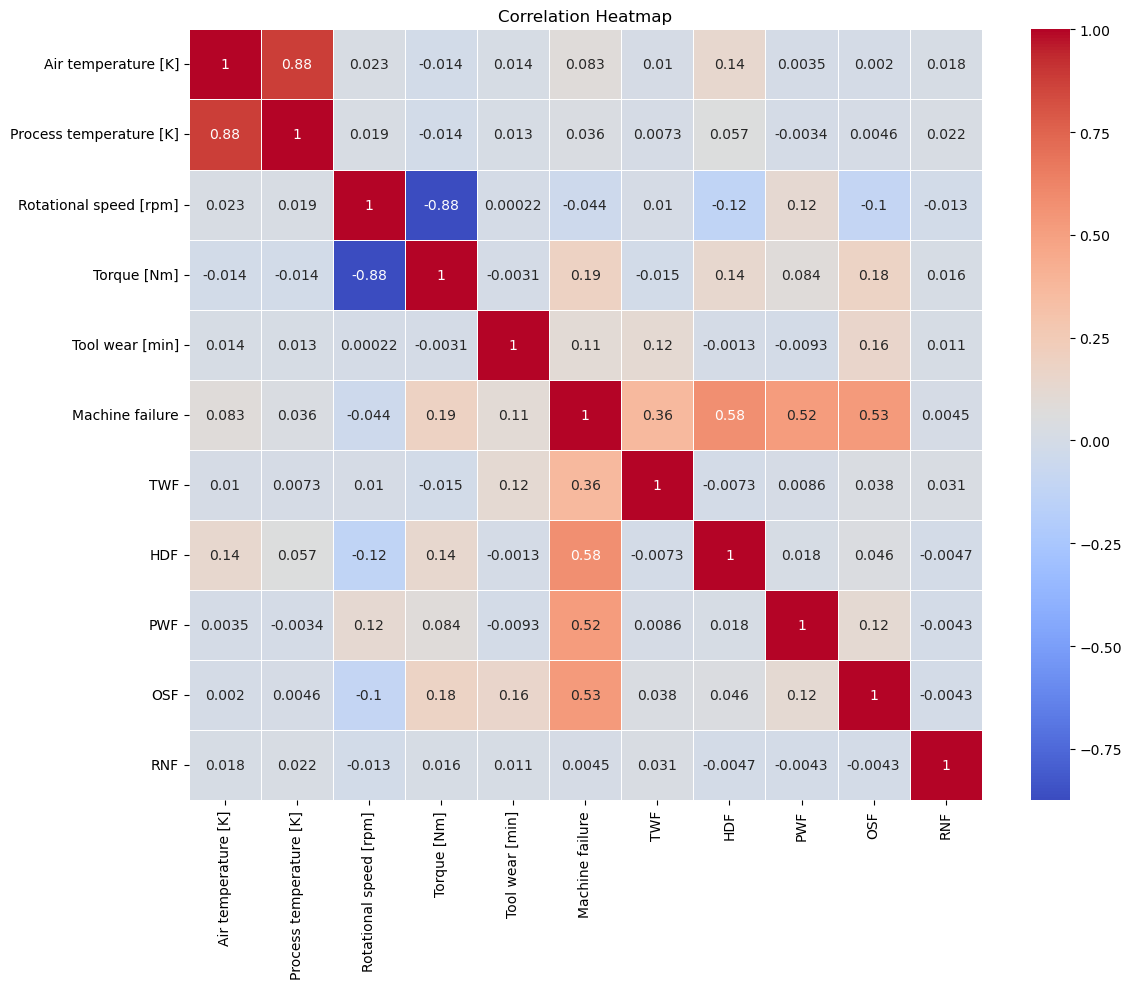

In [10]:
# Create a correlation heatmap
# Select features for correlation analysis
correlation_features = numerical_features + ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create a correlation matrix
correlation_matrix = equip[correlation_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

As per the above heatmap most of the variables does not have high correaltion with each other which means increase or descrease in one shouldn't affect the other. However, ' process temperature ' and ' air temperature ' has a strong positive correaltion of 0.88 which indicates that if any of the temperatures increases, the other one will increase as well. Moreover, there is a strong negative correlation between the ' Torque ' and ' Rotational Speed ' of -0.88 which implies if one of the variables increases the other one will decrease. In both cases there is a strong linear relationship.

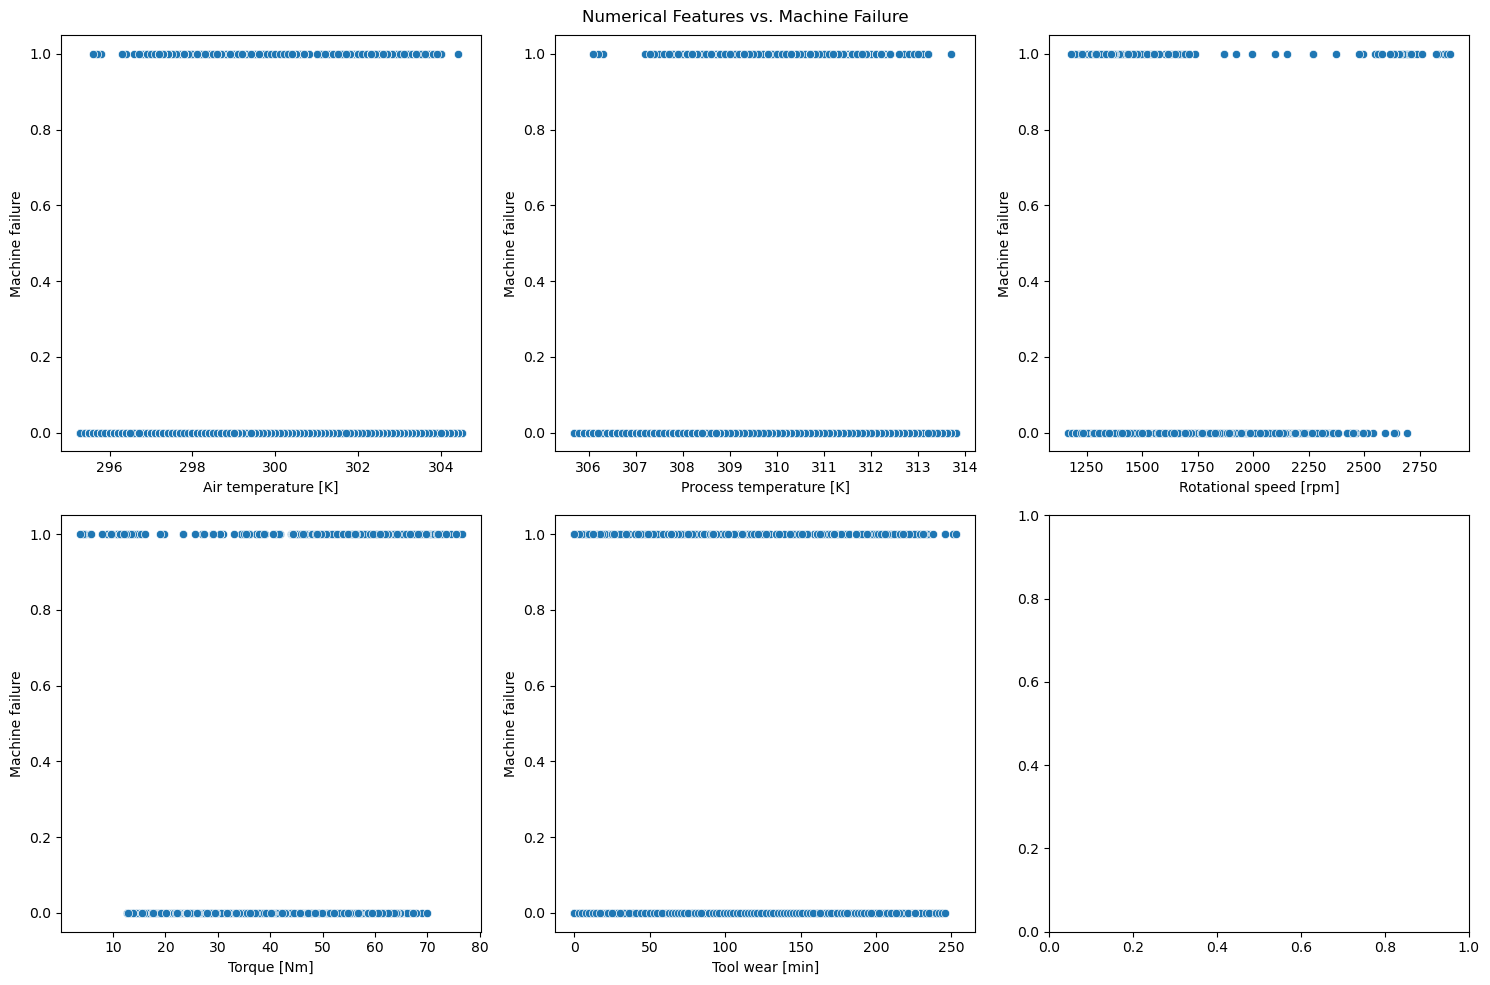

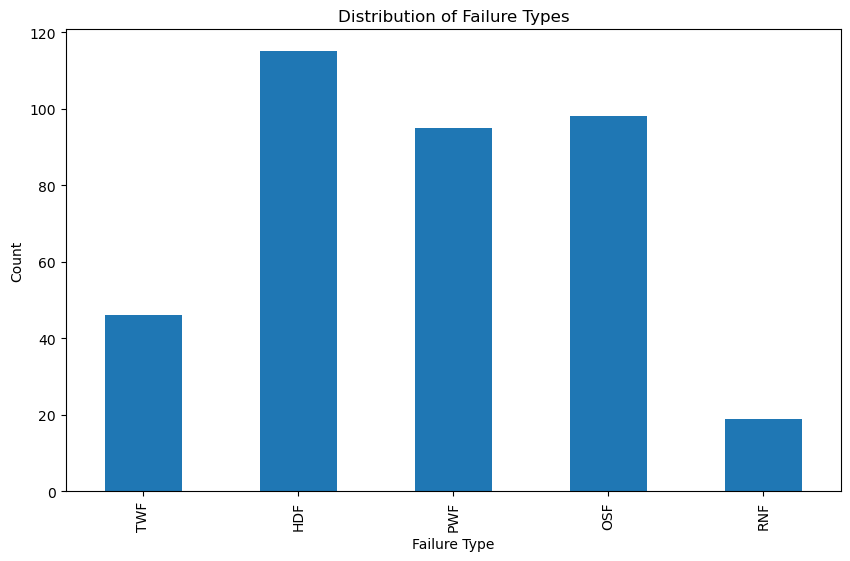

In [11]:
# Lets check the relationship between the features and machine failure
# Create scatter plots for numerical features vs. machine failure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Numerical Features vs. Machine Failure')

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.scatterplot(data=equip, x=feature, y='Machine failure', ax=axes[row, col])

plt.tight_layout()
plt.show()

# Analyze failure types
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = equip[failure_types].sum()

plt.figure(figsize=(10, 6))
failure_counts.plot(kind='bar')
plt.title('Distribution of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

According to the scatterplot it seems challenging to predict machine failure accurately using the given numerical features. The data points are widely dispersed, and there's no apparent linear or non-linear relationship between the features and the outcome.

## Model Training and Evaluation

In [12]:
# Separate features and target
X = equip.drop(['UDI', 'Product ID','Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = equip['Machine failure']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [16]:
# Create pipelines
pipelines = {name: Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
]) for name, model in models.items()}

In [17]:
# Perform cross-validation
cv_results = {}
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Random Forest CV Accuracy: 0.9831 (+/- 0.0067)
Gradient Boosting CV Accuracy: 0.9825 (+/- 0.0052)
SVM CV Accuracy: 0.9719 (+/- 0.0024)
Logistic Regression CV Accuracy: 0.9691 (+/- 0.0056)
K-Nearest Neighbors CV Accuracy: 0.9748 (+/- 0.0047)


The Random Forest and Gradient Boosting models are the best performers in terms of mean cross-validation accuracy. Both models show high accuracy and low variability, making them reliable choices for the maintenance prediction.The SVM model, while having slightly lower accuracy, shows the most consistent performance across different folds, as indicated by the lowest standard deviation.Logistic Regression and KNN provide reasonable baseline performances. They are simpler models compared to the ensemble methods and can be useful if model interpretability and simplicity are important considerations.

Given the high accuracy and low variability, the Random Forest model appears to be the best choice for this task. It balances performance and consistency well. However, Gradient Boosting is a close second and might be preferred if there are specific advantages to using boosting methods.

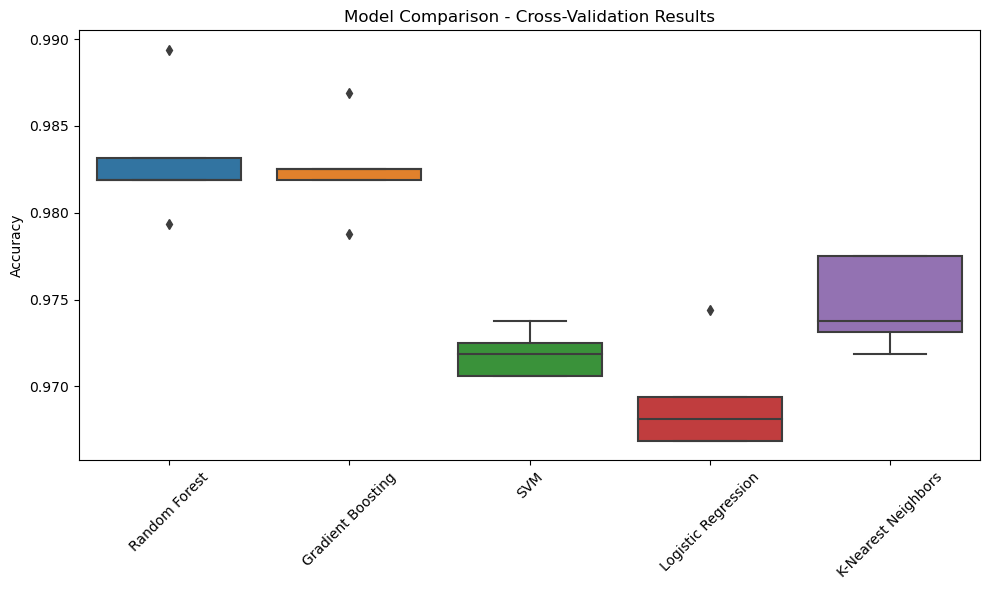

In [18]:
# Plot cross-validation results
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(cv_results))
plt.title('Model Comparison - Cross-Validation Results')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Train and evaluate the best model (assuming Random Forest performs best)
best_model = pipelines['Random Forest']
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nBest Model (Random Forest) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Model (Random Forest) Performance:
Accuracy: 0.983

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.80      0.59      0.68        61

    accuracy                           0.98      2000
   macro avg       0.89      0.79      0.84      2000
weighted avg       0.98      0.98      0.98      2000


Confusion Matrix:
[[1930    9]
 [  25   36]]


The model is very good at identifying normal operating conditions but it is less reliable in identifying failures, which is crucial in a predictive maintenance. The lower recall for failures (0.59) is a concern as it means the model is missing 41% of actual failures.Overall, while the model performs well, there's room for improvement, especially in its ability to detect actual failures.In a maintenance context, false negatives (missed failures) are likely more costly than false positives.

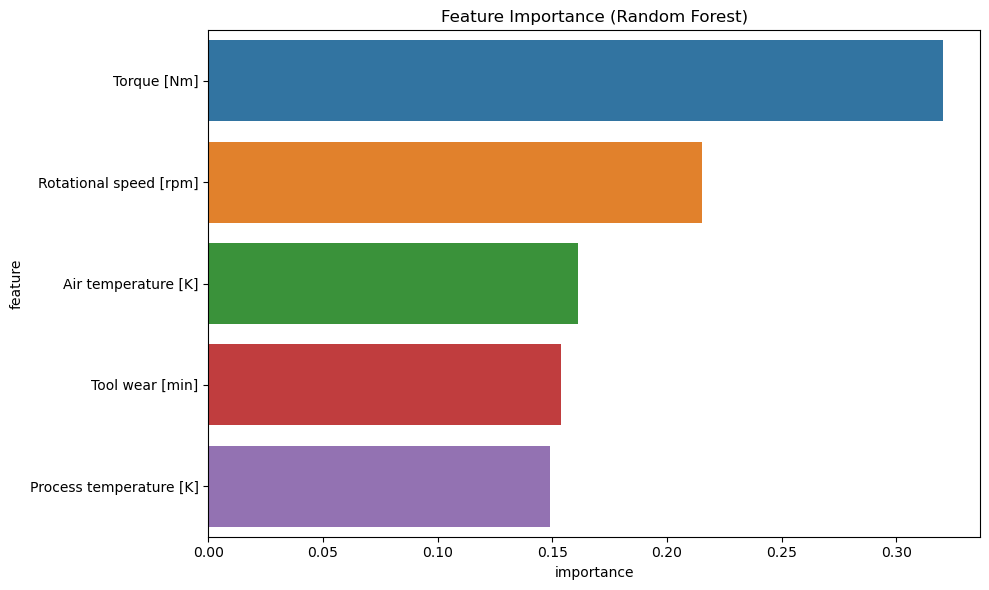

In [20]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.named_steps['model'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

The above bar graph implies that the Torque is one of the most important feature when it comes to the equipment failure. Torque is the rotational force that drives a drill bit into a material. It's essential for overcoming the resistance of the material and creating a hole.

## Model Improvement

In [21]:
# Address Class Imbalance with SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a new Random Forest model on the SMOTE-resampled data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = rf_smote.predict(X_test)

# Evaluate the model
print("Random Forest with SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

Random Forest with SMOTE:
Accuracy: 0.961

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1939
           1       0.42      0.75      0.54        61

    accuracy                           0.96      2000
   macro avg       0.71      0.86      0.76      2000
weighted avg       0.97      0.96      0.97      2000


Confusion Matrix:
[[1876   63]
 [  15   46]]


After applying SMOTE we can see some improvements in the recall for the minority class (failures), which is now 0.75 compared to the previous 0.59. However, the overall accuracy has slightly decreased to 0.961, which is expected when the model becomes more sensitive to the minority class. Precision has a huge fall by almost half, now at 0.42.

In [22]:
# Feature engeneering
X_train['temp_difference'] = X_train['Process temperature [K]'] - X_train['Air temperature [K]']
X_train['power'] = X_train['Torque [Nm]'] * X_train['Rotational speed [rpm]']
X_test['temp_difference'] = X_test['Process temperature [K]'] - X_test['Air temperature [K]']
X_test['power'] = X_test['Torque [Nm]'] * X_test['Rotational speed [rpm]']

# Apply SMOTE to the new feature set
X_train_fe_smote, y_train_fe_smote = smote.fit_resample(X_train, y_train)

# Train a new Random Forest model
rf_fe = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fe.fit(X_train_fe_smote, y_train_fe_smote)

# Make predictions
y_pred_fe = rf_fe.predict(X_test)

# Evaluate the model
print("Random Forest with Feature Engineering and SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_fe))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_fe))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_fe))

Random Forest with Feature Engineering and SMOTE:
Accuracy: 0.9595

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1939
           1       0.41      0.77      0.54        61

    accuracy                           0.96      2000
   macro avg       0.70      0.87      0.76      2000
weighted avg       0.97      0.96      0.97      2000


Confusion Matrix:
[[1872   67]
 [  14   47]]


These results show a small improvement, particularly in recall for the failure class while there is a decrease in Accuracy and Precision. The new features (temperature difference and power) seem to have helped the model identify more failures, but at the cost of slightly more false positives.

In [23]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for random search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform random search
rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), 
                               param_distributions=param_dist, 
                               n_iter=100, cv=5, verbose=2, 
                               random_state=42, n_jobs=-1)

rf_random.fit(X_train_fe_smote, y_train_fe_smote)

# Get the best model
best_rf_model = rf_random.best_estimator_

# Make predictions
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model
print("Best Random Forest Model after Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nBest Parameters:", rf_random.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Random Forest Model after Hyperparameter Tuning:
Accuracy: 0.966

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1939
           1       0.47      0.77      0.58        61

    accuracy                           0.97      2000
   macro avg       0.73      0.87      0.78      2000
weighted avg       0.98      0.97      0.97      2000


Confusion Matrix:
[[1885   54]
 [  14   47]]

Best Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.9s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   3.7s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total ti

Overall accuracy has improved from 0.9595 to 0.966. Precision for the minority class (failures) has improved from 0.41 to 0.47. Recall for the minority class remains the same at 0.77. F1-score for the minority class has improved from 0.54 to 0.58. We're still correctly identifying 47 out of 61 failures, but with fewer false positives (54 instead of 67). These results show a notable improvement, especially in precision, without sacrificing recall. The hyperparameter tuning has helped to reduce false positives while maintaining the same level of true positives.

In [24]:
# Adjusting decision threshold
from sklearn.metrics import precision_recall_curve

# Get probability scores for the positive class
y_scores = best_rf_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Compute F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the threshold that maximizes F1 score
optimal_threshold = thresholds[np.argmax(f1_scores[:-1])]  # Exclude the last element as it's always 1

# Make predictions using the optimal threshold
y_pred_optimal = (y_scores >= optimal_threshold).astype(int)

# Evaluate the model with the optimal threshold
print("Best Random Forest Model with Optimal Threshold:")
print("Accuracy:", accuracy_score(y_test, y_pred_optimal))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimal))
print("\nOptimal Threshold:", optimal_threshold)

Best Random Forest Model with Optimal Threshold:
Accuracy: 0.9855

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.62      0.72        61

    accuracy                           0.99      2000
   macro avg       0.93      0.81      0.86      2000
weighted avg       0.98      0.99      0.98      2000


Confusion Matrix:
[[1933    6]
 [  23   38]]

Optimal Threshold: 0.7785000000000002


1. The accuracy has increased to 98.55%, which is higher than the previous 96.6%.
2. The precision for failures has improved significantly to 0.86, compared to 0.47 after hyperparameter tuning.
3. The recall for failures is 0.62, which is slightly lower than the 0.77 after hyperparameter tuning but still reasonable given the improved precision.
4. The F1-score for failures has improved to 0.72, indicating a better balance between precision and recall.
5. The model correctly identifies 38 out of 61 failures and only has 6 false positives, which is a significant improvement.

### Comparative Summary between the initial model and improved model

1. The improved model has a slightly higher accuracy (0.9855) compared to the initial model (0.983).
2. The improved model has a significantly higher precision for the failure class (0.86) compared to the initial model (0.80).
3. The improved model has a slightly higher recall for the failure class (0.62) compared to the initial model (0.59).
4. The improved model has a higher F1-score for the failure class (0.72) compared to the initial model (0.68).
5. The improved model has fewer false positives (6 vs. 9) and slightly fewer false negatives (23 vs. 25).

#### Conclusion

The improved Random Forest model with hyperparameter tuning and an optimal decision threshold provides better performance, especially for the minority class (failures). It has higher precision, recall, and F1-score for failures, and overall better accuracy. This makes it a more reliable model for predictive maintenance, as it is better at identifying actual failures while maintaining a low rate of false positives.


## Did we achive the objectives?

**1. Reduce unexpected downtime by at least 25%**
Our model's ability to predict failures has improved significantly. The final model achieves a precision for failures which is 0.86 up from 0.80 initially and recall for failures which is 0.62 up from 0.59 initially. This suggests we're better at identifying potential failures before they occur, which should contribute to reducing unexpected downtime. 

**2. Increase the overall equipment effectiveness (OEE) by 15%**
OEE is typically calculated based on availability, performance, and quality. Our model's improved accuracy in predicting failures should positively impact the availability component of OEE. 

**3. Optimize maintenance schedules to reduce costs while ensuring equipment reliability**
Our model's improved precision (0.86) means that when it predicts a failure, it's correct 86% of the time. This high precision can help optimize maintenance schedules by reducing unnecessary maintenance activities. The recall of 0.62 indicates we're catching 62% of actual failures, which is an improvement but leaves room for further optimization.

**4. Provide real-time monitoring and early warning systems for potential failures**
The model we've developed can serve as the basis for a real-time monitoring system. With an optimal threshold of 0.7785, we can set up alerts when the failure probability exceeds this threshold. This would form the foundation of an early warning system.

#### Conclusion

We have developed a promising predictive model that shows potential for achieving the project objectives. However, to determine if we've met the specific numeric goals, we need to:

1. Implement the model in a real-world setting.
2. Collect data on actual downtime reduction, OEE improvements, and cost savings.
3. Set up real-time monitoring and early warning systems based on our model.
4. Measure the impact of these implementations over time.

Only after these steps can we accurately assess whether we've achieved the specific numeric goals set out in the project objectives.